In [1]:
# setting up paths

from sys import path
from os import environ

path.append("/home/leandrosantos/IC-AutoEncoder/")
path.append("/home/leandrosantos/IC-AutoEncoder/modules/")

environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from modules.DataMod import DataSet
import matplotlib.pyplot as plt
import random as rd 
import cupy

cifar, tiny, dataset, light_noised_dataset, heavy_noised_dataset = DataSet(), DataSet(), DataSet(), DataSet(), DataSet()

cifar.load_rafael_cifar_10_noise_data()
tiny.load_rafael_tinyImagenet_64x64_noise_data()

dataset.load_cifar_and_tiny(cifar, tiny)
#dataset.normalize_dataset()

print("Clean dataset loaded!")

cifar.load_rafael_cifar_10_noise_data()
tiny.load_rafael_tinyImagenet_64x64_noise_data()

light_noised_dataset.load_cifar_and_tiny(cifar, tiny)
light_noised_dataset.add_gaussian_noise(dist_normal = 0.1) # adds gaussian noise
#light_noised_dataset.normalize_dataset()

print("Lightly noised dataset loaded!")

cifar.load_rafael_cifar_10_noise_data()
tiny.load_rafael_tinyImagenet_64x64_noise_data()

heavy_noised_dataset.load_cifar_and_tiny(cifar, tiny)
heavy_noised_dataset.add_gaussian_noise(dist_normal = 0.3)
#heavy_noised_dataset.normalize_dataset()

print("Heavily noised dataset loaded!")

cupy.get_default_memory_pool().free_all_blocks()
cupy.get_default_pinned_memory_pool().free_all_blocks()

2023-10-04 23:06:09.450979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 23:06:10.218659: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-04 23:06:10.218727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-04 23:06:10.218737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Clean dataset loaded!
Lightly noised dataset loaded!
Heavily noised dataset loaded!


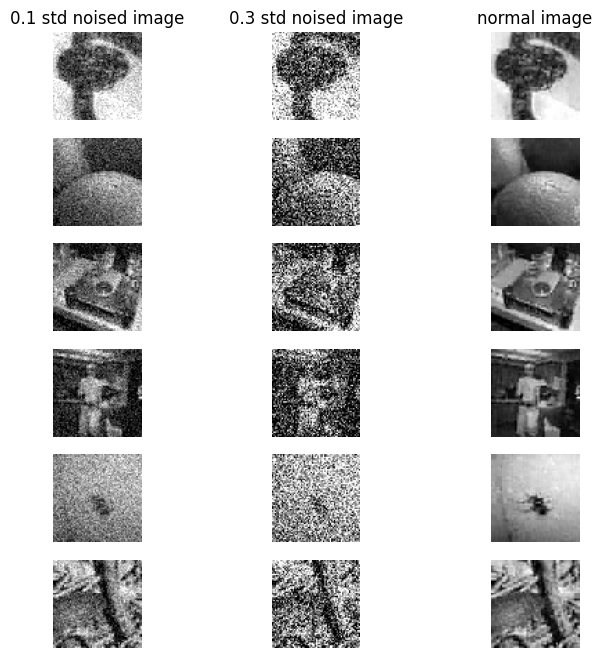

In [3]:
plt.figure(figsize=(8, 8))
columns = 3
rows = 6

magic_number = [rd.randint(0, dataset.x_train.shape[0]-1) for x in range(rows)]

plt.subplot(rows, columns, 1)
plt.title("0.1 std noised image")
plt.subplot(rows, columns, 2)
plt.title("0.3 std noised image")
plt.subplot(rows, columns, 3)
plt.title("normal image")

for idx in range(rows):
    plt.subplot(rows, columns, columns*idx + 1)
    plt.imshow(light_noised_dataset.x_train[magic_number[idx]], cmap="gray")
    plt.axis("off")
    plt.subplot(rows, columns, columns*idx + 2)
    plt.imshow(heavy_noised_dataset.x_train[magic_number[idx]], cmap="gray")
    plt.axis("off")
    plt.subplot(rows, columns, columns*idx + 3)
    plt.imshow(dataset.x_train[magic_number[idx]], cmap="gray")
    plt.axis("off")